<a href="https://colab.research.google.com/github/aaryagharmalkar/machine-learning-lab/blob/main/ML_expt2_aarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and import Libraries

In [ ]:
# Install libraries (if needed in Colab)
!pip install -q scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load Dataset

In [ ]:
# Load Titanic dataset from raw GitHub URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Preview data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Analysis

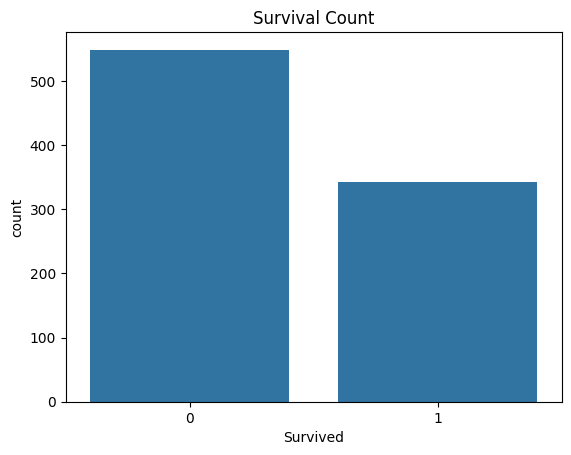

In [ ]:
# Check for null values
df.isnull().sum()

# Summary stats
df.describe()

# Count plot of survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


Data Preprocessing

In [ ]:
# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Encode 'Embarked' using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Final check
df.head()


/tmp/ipython-input-3972977168.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3972977168.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


Train Test Split

In [ ]:
# Features and label
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build and Train Logistic Regression Model

In [ ]:
# Create model
model = LogisticRegression(max_iter=1000)

# Fit model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Evaluate the Model

Accuracy: 0.8101


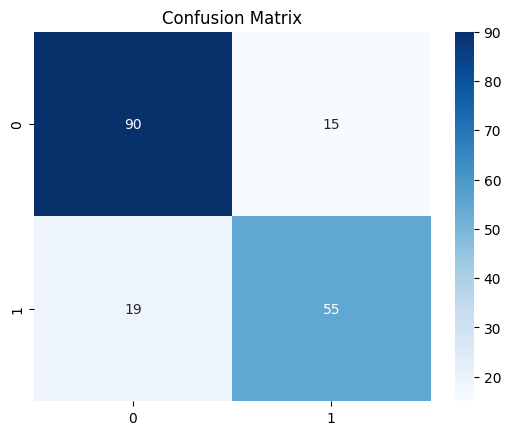

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Recall (Sensitivity): 0.7432
Specificity (True Negative Rate): 0.8571
F1-Score: 0.7639


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 3. Precision, Recall, F1-score (from classification report)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Recall (Sensitivity)
TP = cm[1, 1]  # True Positives
FN = cm[1, 0]  # False Negatives
recall = TP / (TP + FN)
print(f"Recall (Sensitivity): {recall:.4f}")

# 5. Specificity (True Negative Rate)
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
specificity = TN / (TN + FP)
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# 6. F1-Score (using precision and recall)
precision = TP / (TP + FP)  # Precision
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-Score: {f1_score:.4f}")



Interpret the Model

In [ ]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


      Feature  Coefficient
1         Sex     2.591222
5        Fare     0.002576
2         Age    -0.030574
4       Parch    -0.107848
6  Embarked_Q    -0.111981
3       SibSp    -0.295062
7  Embarked_S    -0.400561
0      Pclass    -0.938047
